In [62]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [63]:
X_df = pd.read_pickle('../features/features.pkl')
X_df = X_df.drop(columns=["Classification", "Token_Count", "Verse_Count"])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
pipeline = make_pipeline(StandardScaler(), kmeans)

In [65]:
pipeline.fit(X_df)

,steps,"[('standardscaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300


In [66]:
cluster_labels = pipeline.named_steps['kmeans'].labels_

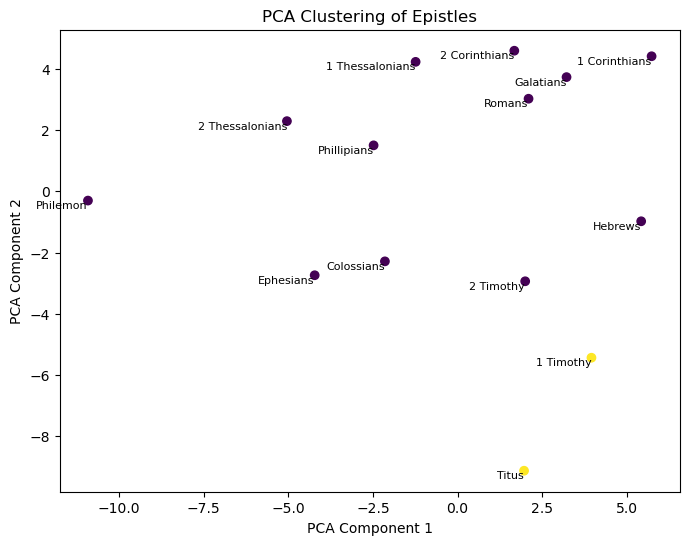

In [67]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(pipeline.named_steps['standardscaler'].transform(X_df))

plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis')
plt.title("PCA Clustering of Epistles")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

for i, letter in enumerate(X_df.index):
    plt.text(
        X_reduced[i, 0],     # PCA x-coordinate
        X_reduced[i, 1],     # PCA y-coordinate
        letter.replace("First", "1").replace("Second", "2"),  # shorten long names
        fontsize=8,
        ha='right',
        va='top'
    )

plt.show()

In [68]:
true_labels = pd.read_pickle('../features/features.pkl')['Classification']
comparison = pd.DataFrame({
    "Cluster": cluster_labels,
    "TrueLabel": true_labels
})
print(comparison)

                      Cluster  TrueLabel
letter                                  
Romans                      0          1
First Corinthians           0          1
Second Corinthians          0          0
Galatians                   0          1
Ephesians                   0          0
Phillipians                 0          1
Colossians                  0          0
First Thessalonians         0          1
Second Thessalonians        0          0
First Timothy               1          0
Second Timothy              0          0
Titus                       1          0
Philemon                    0          1
Hebrews                     0          0
